### import everything

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_moons

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

Using TensorFlow backend.


### 製作2維資料

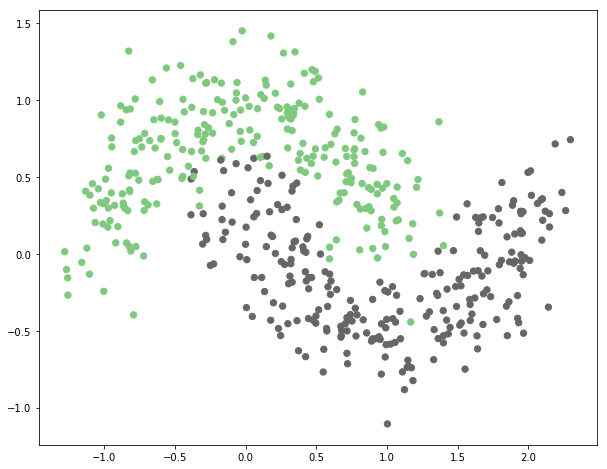

In [2]:
data, label = make_moons(n_samples=500, noise=0.2, random_state=0)
label = label.reshape(500, 1)

plt.scatter(data[:,0], data[:,1], s=40, c=label, cmap=plt.cm.Accent)

### Multilayer neural network

In [3]:
model = Sequential()
model.add(Dense(50, input_shape=(2,), activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='binary_crossentropy')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                150       
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 2,751.0
Trainable params: 2,751
Non-trainable params: 0.0
_________________________________________________________________


### 更新權重1000次

In [4]:
%%time
model.fit(data, label, epochs=1000, verbose=0)

CPU times: user 28.7 s, sys: 4.74 s, total: 33.4 s
Wall time: 17.2 s


### Accuary

In [5]:
result = model.predict(data)
result[result >= 0.5] = 1
result[result < 0.5] = 0
print('Accuary:', float(sum(label == result)[0])  / label.shape[0])

Accuary: 0.974


### 畫出結果

In [6]:
def plot_decision_boundary(X, y, model):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                         np.arange(y_min, y_max, h))
    pred_every_point = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(pred_every_point)
    Z[Z>=0.5] = 1
    Z[Z<0.5] = 0
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], s=40,  c=y, cmap=plt.cm.BuGn)

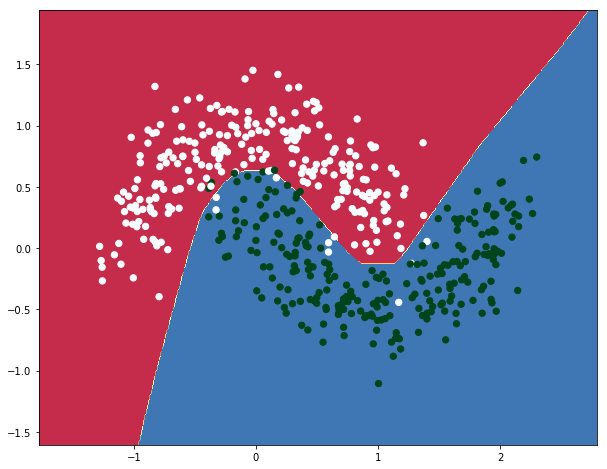

In [7]:
plot_decision_boundary(data, label, model)

# Your turn!

* 隱藏層的層數是否影響收斂步數?
* 隱藏層的層數是否影響訓練時間?
* 隱藏層的神經元數量是否影響收斂步數?
* 隱藏層的神經元數量是否影響訓練時間?
* 過多的層數或過度的訓練是否會造成overfitting?

In [ ]:
model = Sequential()

#####################
# Hidden layer隨你加 #
#####################

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='binary_crossentropy')
model.summary()

In [ ]:
%%time
epochs = # 給定訓練步數，看是否影響準確度

model.fit(data, label, epochs=epochs, verbose=0)

In [ ]:
# 觀看你的神經網路的準確度

result = model.predict(data)
result[result >= 0.5] = 1
result[result < 0.5] = 0
print('Accuary:', float(sum(label == result)[0])  / label.shape[0])